In [1]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from Games import *
import Utility
from os import listdir
from os.path import join
from json import load

In [3]:
def get_playthroughs(config):
    playthroughs = []
    for filename in listdir(config.BASE_DIR):
        if 'fitagent_playthrough_' not in filename:
            continue

        with open(join(config.BASE_DIR, filename), 'r') as f:
            data = load(f)
            playthroughs.append((filename, data))
            
    return playthroughs

In [4]:
def heatmap(playthrough_data, graph, filename, bounds):
    max_x, max_y = bounds
    data = np.zeros((max_x, max_y))
    mask = np.ones((max_x, max_y))
    for n in graph.nodes:
        if '__' in n:
            continue
            
        a,b,_ = n.split(',')
        mask[int(a)][int(b)] = 0.0
    
    for run in playthrough_data:
        for segment, _, _ in run:
            if '__' in segment:
                continue
                
            a, b, _ = segment.split(',')
            data[int(a)][int(b)] += 1.0
    
    sns.set(rc = {'figure.figsize':(8,4)})
    ax = sns.heatmap(
        data, 
        mask=mask,
        square=True,
        cmap='Blues'
    )
#     ax = sns.heatmap(data, square=True)
    ax.invert_yaxis()
    ax.set_title(filename)
    ax.set_facecolor("gray")
    
    # reduce frequency for xticks
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 5 == 0:  
            label.set_visible(True)
        else:
            label.set_visible(False)
    
    # reduce frequency for y ticks
    for ind, label in enumerate(ax.get_yticklabels()):
        if ind % 5 == 0:  
            label.set_visible(True)
        else:
            label.set_visible(False)

    plt.show()

In [5]:
def plot_reward_over_time(playthroughs):
    plot_data = {}
    for filename, data in playthroughs:
        legend_name = filename.split('.')[0].split('_')[-1]
        plot_data[legend_name] = []
        total_reward = 0
        
        for level in data:
            for _, _, r in level:
                total_reward += r
            
            plot_data[legend_name].append(total_reward)
    
    sns.set(rc = {'figure.figsize':(15,8)})
    ax = sns.lineplot(data=plot_data)
    ax.set_title('Reward over Time')
        
    plt.show()

## DungeonGrams

In [6]:
config = DungeonGrams
graph = Utility.get_graph(config.BASE_DIR, config.TRANSPOSE, True)
playthroughs = get_playthroughs(config)

Loading links from: ./GramElitesData/DungeonData/gram_elites/links_True.json


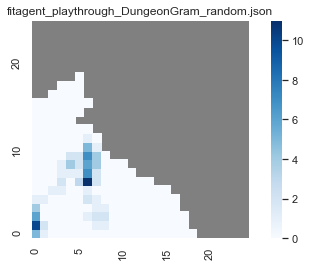

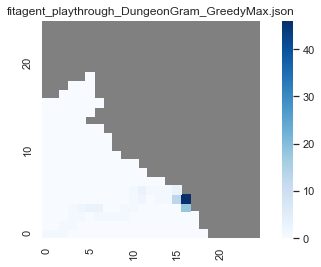

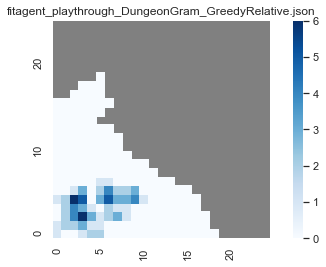

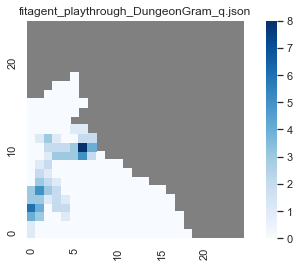

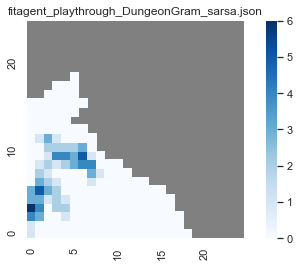

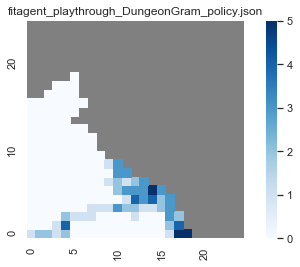

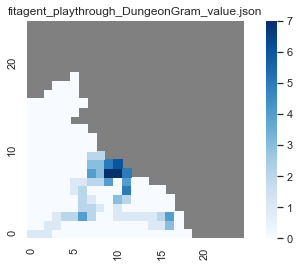

In [7]:
for filename, data in playthroughs:
    heatmap(data, graph, filename, (25,25))

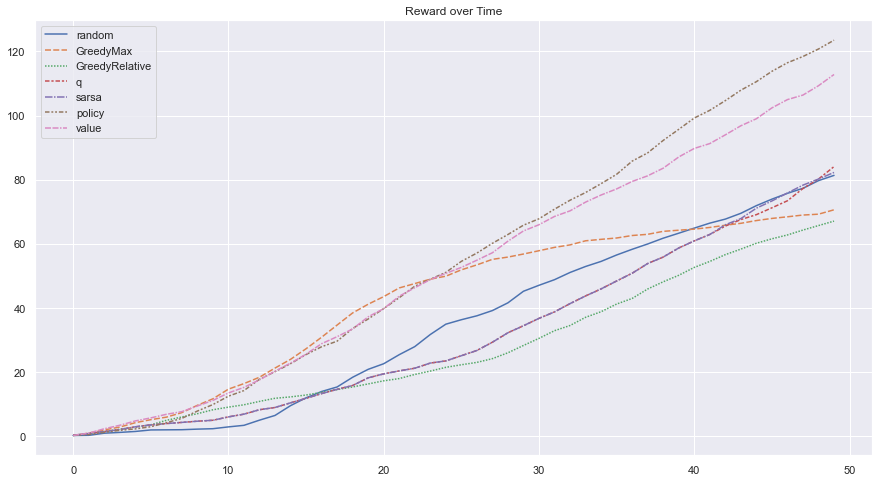

In [8]:
plot_reward_over_time(playthroughs)

### Mario

In [9]:
config = Mario
graph = Utility.get_graph(config.BASE_DIR, config.TRANSPOSE, True)
playthroughs = get_playthroughs(config)

Loading links from: ./GramElitesData/MarioData/gram_elites/links_True.json


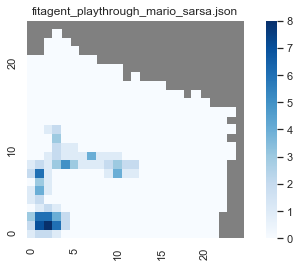

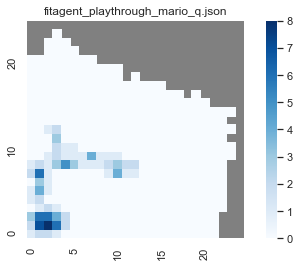

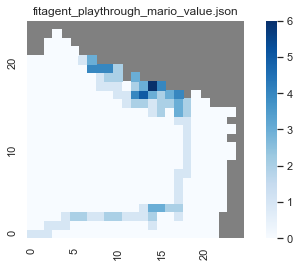

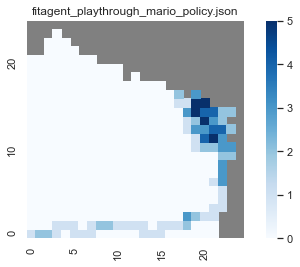

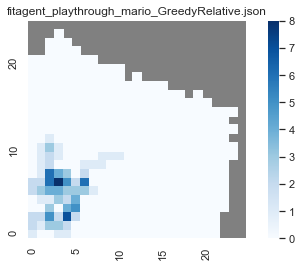

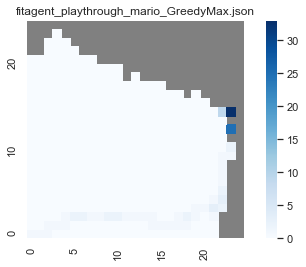

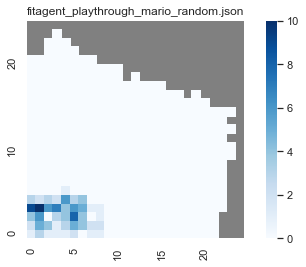

In [10]:
for filename, data in playthroughs:
    heatmap(data, graph, filename, (25,25))

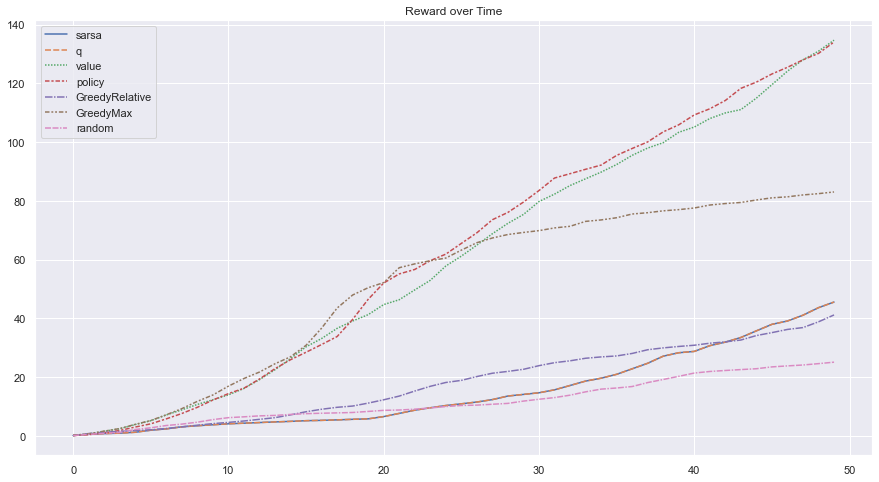

In [11]:
plot_reward_over_time(playthroughs)

## Icarus

In [12]:
config = Icarus
graph = Utility.get_graph(config.BASE_DIR, config.TRANSPOSE, True)
playthroughs = get_playthroughs(config)

Loading links from: ./GramElitesData/IcarusData/gram_elites/links_True.json


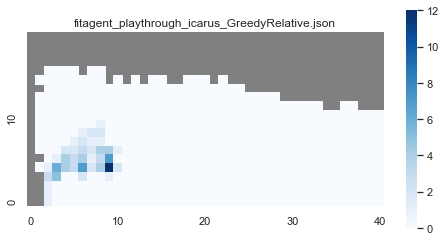

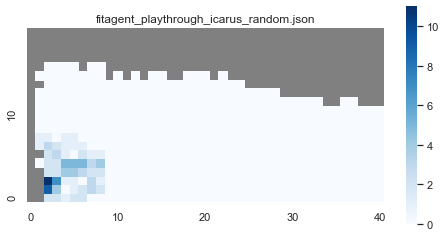

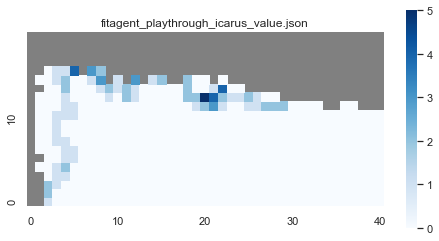

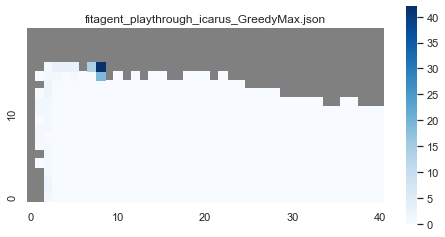

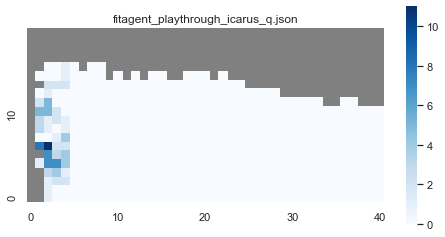

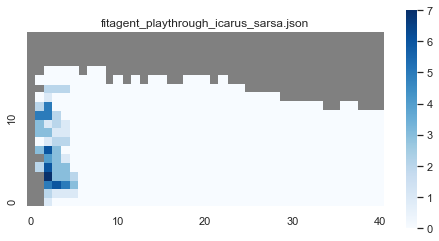

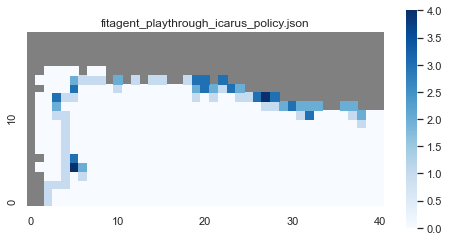

In [13]:
for filename, data in playthroughs:
    heatmap(data, graph, filename, (20,41))

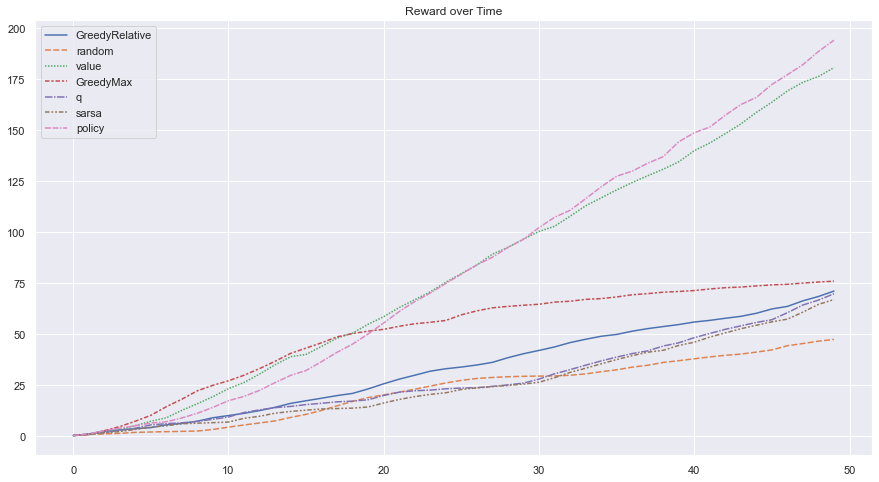

In [14]:
plot_reward_over_time(playthroughs)